<a href="https://colab.research.google.com/github/melendezdamaris/Solucion-Desafio-Kaggle/blob/main/DesafioKaggle_Melendez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install -U imbalanced-learn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.4
    Uninstalling imbalanced-learn-0.12.4:
      Successfully uninstalled imbalanced-learn-0.12.4


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer # Import SimpleImputer


In [4]:
# Cargar los datos de entrenamiento y prueba
train_data = pd.read_csv('train.csv')
test_public_data = pd.read_csv('test_public.csv')
test_private_data = pd.read_csv('test_private.csv')

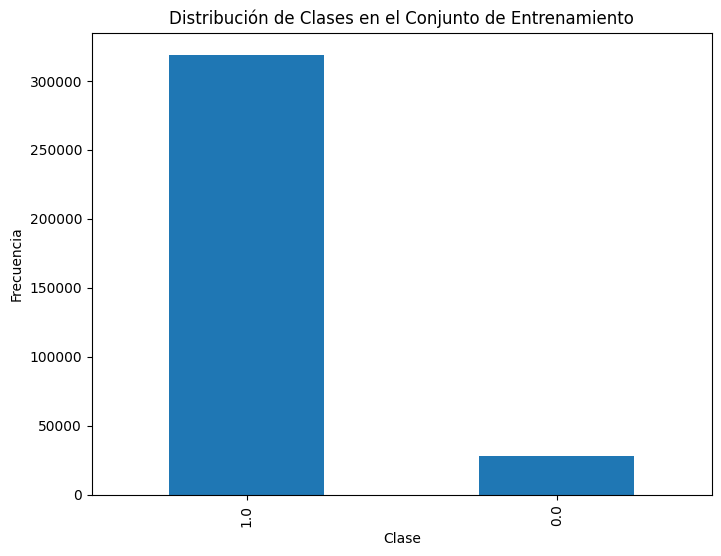

In [5]:
# Visualizar la distribución de las clases en el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
train_data['CHD_OR_MI'].value_counts().plot(kind='bar')
plt.title('Distribución de Clases en el Conjunto de Entrenamiento')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

In [15]:
# Eliminar columnas no numéricas
train_data = train_data.select_dtypes(include=[float, int])
test_public_data = test_public_data.select_dtypes(include=[float, int])
test_private_data = test_private_data.select_dtypes(include=[float, int])

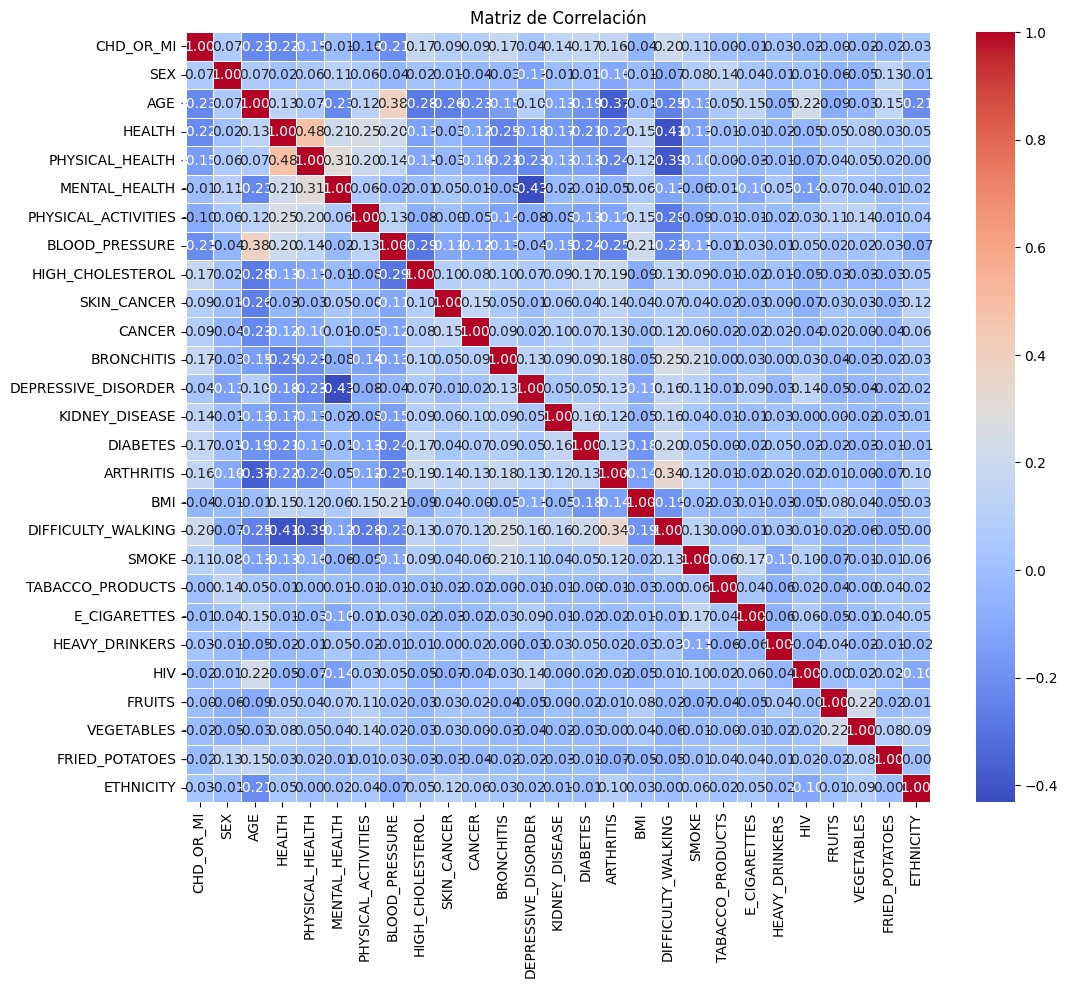

In [13]:
# Visualizar la correlación entre características utilizando seaborn heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [17]:
# Separar las características (X) y la variable objetivo (y) en el conjunto de entrenamiento
X_train = train_data.drop('CHD_OR_MI', axis=1)
y_train = train_data['CHD_OR_MI']

In [18]:
# Separar las características (X) y la variable objetivo (y) en el conjunto de prueba público
X_test_public = test_public_data.drop('CHD_OR_MI', axis=1)
y_test_public = test_public_data['CHD_OR_MI']


In [19]:
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test_public = scaler.transform(X_test_public)
X_test_private = scaler.transform(test_private_data)

In [23]:
# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X_train = imputer.fit_transform(X_train) # Fit and transform on X_train
X_test_public = imputer.transform(X_test_public) # Transform X_test_public
X_test_private = imputer.transform(test_private_data) # Transform test_private_data


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [24]:
# Aplicar SMOTE para manejar el desbalanceo de datos en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [25]:
# Entrenar el modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Realizar predicciones en el conjunto de prueba público
y_pred_public = model.predict(X_test_public)

In [26]:
# Calcular el F1-score y mostrar el reporte de clasificación para el conjunto de prueba público
f1_public = f1_score(y_test_public, y_pred_public)
report_public = classification_report(y_test_public, y_pred_public)

print(f"F1-score (public test set): {f1_public}")
print("Classification Report (public test set):")
print(report_public)

F1-score (public test set): 0.9494120393694014
Classification Report (public test set):
              precision    recall  f1-score   support

         0.0       0.35      0.19      0.24      3532
         1.0       0.93      0.97      0.95     39874

    accuracy                           0.91     43406
   macro avg       0.64      0.58      0.60     43406
weighted avg       0.88      0.91      0.89     43406



In [27]:
# Realizar predicciones en el conjunto de prueba privado
y_pred_private = model.predict(X_test_private)


In [28]:
# Guardar las predicciones del conjunto de prueba privado en un archivo CSV
private_predictions = pd.DataFrame(y_pred_private, columns=['CHD_OR_MI'])
private_predictions.to_csv('resultados.csv', index=False)

print("Predicciones para el conjunto de prueba privado guardadas en 'resultados.csv'.")

Predicciones para el conjunto de prueba privado guardadas en 'resultados.csv'.
